In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
os.environ['R_HOME']='/home/tguo/tguo2/miniconda3/envs/STAGATE/lib/R'
import sys
from sklearn.metrics.cluster import adjusted_rand_score
import STAGATE
import anndata
import scipy as sp
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import euclidean_distances
methods=['GraphSCIDRL','harmony_SEDR','harmony_STAGATE','seurat','harmony']

In [2]:
def refine(sample_id, pred, dis, shape="hexagon"):
    refined_pred=[]
    pred=pd.DataFrame({"pred": pred}, index=sample_id)
    dis_df=pd.DataFrame(dis, index=sample_id, columns=sample_id)
    if shape=="hexagon":
        num_nbs=6 
    elif shape=="square":
        num_nbs=4
    else:
        print("Shape not recongized, shape='hexagon' for Visium data, 'square' for ST data.")
    for i in range(len(sample_id)):
        index=sample_id[i]
        dis_tmp=dis_df.loc[index, :].sort_values()
        nbs=dis_tmp[0:num_nbs+1]
        nbs_pred=pred.loc[nbs.index, "pred"]
        self_pred=pred.loc[index, "pred"]
        v_c=nbs_pred.value_counts()
        if (v_c.loc[self_pred]<(num_nbs+1)/2) and (np.max(v_c)>(num_nbs+1)/2):
            refined_pred.append(v_c.idxmax())
        else:           
            refined_pred.append(self_pred)
    return refined_pred

In [6]:
# dirs="/data02/tguo/space_batch_effect/mouse_brain/"
# sample_name=["all_posterior1","all_posterior2","all_anterior1","all_anterior2"]
# IDX=np.array([0,1,2,3])
# feat=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_mat.csv",header=0,index_col=0,sep=',')
# meta=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_meta.csv",header=0,index_col=0,sep=',')
# coord=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_coord.csv",header=0,index_col=0,sep=',')
# flags='_'+str(sample_name[i])
# for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
#     feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')))
#     meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_meta.csv",header=0,index_col=0,sep=',')))
#     coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')))
#     flags=flags+'_'+str(sample)
# adata = sc.AnnData(feat)
# adata.var_names_make_unique()
# coord = coord.loc[adata.obs_names, ['x', 'y']]
# adata.obsm["spatial"] = coord.to_numpy()
# adata.X=sp.sparse.csr_matrix(adata.X)
# adata.obs= meta.loc[adata.obs_names, :]   
# adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
# # coord_combine=pd.read_csv(dirs+"gtt_output/coordinate_file/gtt_new_coordinate"+flags+"_mclust.csv",header=0,index_col=0,sep=',')
# # adata.obsm['spatial_combine']=coord_combine.loc[adata.obs_names, ['x', 'y']]

FileNotFoundError: [Errno 2] No such file or directory: '/data02/tguo/space_batch_effect/mouse_brain/gtt_output/coordinate_file/gtt_new_coordinate_all_posterior1_all_posterior2_all_anterior1_all_anterior2_mclust.csv'

In [4]:
# dirs="/data02/tguo/space_batch_effect/Hippo/"
# sample_name=["10X_Normal","10X_DAPI","10X_FFPE"]
# IDX=np.array([0,1,2])
# i=0
# feat=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_mat.csv",header=0,index_col=0,sep=',')
# meta=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_meta.csv",header=0,index_col=0,sep=',')
# coord=pd.read_csv(dirs+"gtt_input/"+str(sample_name[i])+"_coord.csv",header=0,index_col=0,sep=',')
# flags='_'+str(sample_name[i])
# for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
#     feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')))
#     meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_meta.csv",header=0,index_col=0,sep=',')))
#     coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')))
#     flags=flags+'_'+str(sample)
# adata = sc.AnnData(feat)
# adata.var_names_make_unique()
# coord = coord.loc[adata.obs_names, ['x', 'y']]
# adata.obsm["spatial"] = coord.to_numpy()
# adata.X=sp.sparse.csr_matrix(adata.X)
# adata.obs= meta.loc[adata.obs_names, :]   
# adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
# coord_combine=pd.read_csv(dirs+"gtt_output/coordinate_file/gtt_new_coordinate"+flags+"_mclust.csv",header=0,index_col=0,sep=',')
# adata.obsm['spatial_combine']=coord_combine.loc[adata.obs_names, ['x', 'y']]

In [40]:
dirs="/data02/tguo/space_batch_effect/mouse_OB/"
sample_name=["BGI","SlideV2"]
IDX=np.array([0,1])
feat=pd.read_csv(dirs+"gtt_input/"+str(sample_name[IDX[0]])+"_mat.csv",header=0,index_col=0,sep=',')
meta=pd.read_csv(dirs+"gtt_input/"+str(sample_name[IDX[0]])+"_meta.csv",header=0,index_col=0,sep=',')
coord=pd.read_csv(dirs+"gtt_input/"+str(sample_name[IDX[0]])+"_coord.csv",header=0,index_col=0,sep=',')
flags='_'+str(sample_name[IDX[0]])
for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
    feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')))
    meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_meta.csv",header=0,index_col=0,sep=',')))
    coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')))
    flags=flags+'_'+str(sample)
adata = sc.AnnData(feat)
adata.var_names_make_unique()
coord = coord.loc[adata.obs_names, ['x', 'y']]
adata.obsm["spatial"] = coord.to_numpy()
adata.X=sp.sparse.csr_matrix(adata.X)
adata.obs= meta.loc[adata.obs_names, :]   
adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
ub=np.unique(adata.obs['batch'])
# coord_combine=pd.read_csv(dirs+"gtt_output/coordinate_file/gtt_new_coordinate"+flags+"_mclust.csv",header=0,index_col=0,sep=',')
# adata.obsm['spatial_combine']=coord_combine.loc[adata.obs_names, ['x', 'y']]

In [136]:
# dirs="/data02/tguo/space_batch_effect/human_DLPFC_10x/"
# sample_name=[151507,151508,151509,151510,151669,151670,151671,151672,151673,151674,151675,151676]
# IDX=np.arange(len(sample_name))
# # IDX=[8,9,10,11]
# flags1=str(sample_name[IDX[0]])
# for i in np.arange(1,len(IDX)):
#     flags1=flags1+'-'+str(sample_name[IDX[i]])
    
# i=IDX[0]
# feat=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample_name[i])+"_features.txt",header=0,index_col=0,sep=',')
# meta=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample_name[i])+"_label.txt",header=0,index_col=0,sep=',')
# coord=pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample_name[i])+"_positions.txt",header=0,index_col=0,sep=',')
# flags='_'+str(sample_name[i])
# for sample in np.array(sample_name)[IDX[1:len(IDX)]]:
#     feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample)+"_features.txt",header=0,index_col=0,sep=',')))
#     meta=pd.concat((meta,pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample)+"_label.txt",header=0,index_col=0,sep=',')))
#     coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input_scanpy/"+flags1+'_'+str(sample)+"_positions.txt",header=0,index_col=0,sep=',')))
#     flags=flags+'_'+str(sample)
# adata = sc.AnnData(feat)
# adata.var_names_make_unique()
# coord = coord.loc[adata.obs_names, ['x', 'y']]
# adata.obsm["spatial"] = coord.to_numpy()
# adata.X=sp.sparse.csr_matrix(adata.X)
# adata.obs= meta.loc[adata.obs_names, :]   
# adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
# # coord_combine=pd.read_csv(dirs+"gtt_output/coordinate_file/gtt_new_coordinate"+flags+"_mclust.csv",header=0,index_col=0,sep=',')
# # adata.obsm['spatial_combine']=coord_combine.loc[adata.obs_names, ['x', 'y']]

In [46]:
dirs="/data02/tguo/space_batch_effect/breast_cancer/"
sample_name=["10X-1","10X-2"]
IDX=np.array([0,1])
feat=pd.read_csv(dirs+"gtt_input/"+str(sample_name[0])+"_mat.csv",header=0,index_col=0,sep=',')
coord=pd.read_csv(dirs+"gtt_input/"+str(sample_name[0])+"_coord.csv",header=0,index_col=0,sep=',')
flags='_'+str(sample_name[0])
for i in np.arange(1,len(sample_name)):
    sample=sample_name[i]
    feat=pd.concat((feat,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_mat.csv",header=0,index_col=0,sep=',')))
    coord=pd.concat((coord,pd.read_csv(dirs+"gtt_input/"+str(sample)+"_coord.csv",header=0,index_col=0,sep=',')))
    flags=flags+'_'+str(sample)
adata = sc.AnnData(feat)
adata.var_names_make_unique()
coord = coord.loc[adata.obs_names, ['x', 'y']]
adata.obsm["spatial"] = coord.to_numpy()
adata.X=sp.sparse.csr_matrix(adata.X)
meta=np.array([i.split('-')[0] for i in adata.obs_names])
meta=pd.DataFrame(meta,index=adata.obs_names,columns=['batch'])
adata.obs= meta.loc[adata.obs_names, :]   
adata.obs['batch']=np.array(adata.obs['batch'],dtype=str)
ub=np.unique(adata.obs['batch'])

In [48]:
embed1=pd.read_csv(dirs+'gtt_output/AGC_embed'+flags+"_xent.csv",header=0,index_col=0,sep=',')
if embed1.shape[1]==16:
    znoise_dim=2
else:
    znoise_dim=4
adata.obsm['GraphSCIDRL']=embed1.values[:,znoise_dim:embed1.shape[1]]
# idx=np.where(adata.obs['celltype']!='Low_Quality')[0]
# adata=adata[idx,:]

#####louvain######
clust3=pd.read_csv(dirs+'metrics/louvain_clust'+flags+'.csv',header=0,index_col=0,sep=',')
adata.obs['GraphSCIDRL_louvain']=np.array(clust3.loc[adata.obs_names,:],dtype=str)
clust3=pd.read_csv(dirs+'metrics/STAGATE_louvain_clust'+flags+'.csv',header=0,index_col=0,sep=',')
adata.obs['STAGATE_louvain']=np.array(clust3.loc[adata.obs_names,:],dtype=str)
clust3=pd.read_csv(dirs+'metrics/SEDR_louvain_clust'+flags+'.csv',header=0,index_col=0,sep=',')
adata.obs['SEDR_louvain']=np.array(clust3.loc[adata.obs_names,:],dtype=str)
clust3=pd.read_csv(dirs+'metrics/seurat_louvain_clust'+flags+'.csv',header=0,index_col=0,sep=',')
adata.obs['seurat_louvain']=np.array(clust3.loc[adata.obs_names,:],dtype=str)
clust3=pd.read_csv(dirs+'metrics/harmony_louvain_clust'+flags+'.csv',header=0,index_col=0,sep=',')
adata.obs['harmony_louvain']=np.array(clust3.loc[adata.obs_names,:],dtype=str)

####mclust#####
# clust2=pd.read_csv(dirs+'metrics/mclust_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['GraphSCIDRL_mclust']=np.array(clust2.loc[adata.obs_names,:],dtype=str)
# clust2=pd.read_csv(dirs+'metrics/STAGATE_mclust_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['STAGATE_mclust']=np.array(clust2.loc[adata.obs_names,:],dtype=str)
# clust2=pd.read_csv(dirs+'metrics/SEDR_mclust_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['SEDR_mclust']=np.array(clust2.loc[adata.obs_names,:],dtype=str)
# clust2=pd.read_csv(dirs+'metrics/seurat_mclust_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['seurat_mclust']=np.array(clust2.loc[adata.obs_names,:],dtype=str)
# clust2=pd.read_csv(dirs+'metrics/harmony_mclust_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['harmony_mclust']=np.array(clust2.loc[adata.obs_names,:],dtype=str)
#####leiden#######
# clust1=pd.read_csv(dirs+'metrics/leiden_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['GraphSCIDRL_leiden']=np.array(clust1.loc[adata.obs_names,:],dtype=str)
# clust1=pd.read_csv(dirs+'metrics/STAGATE_leiden_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['STAGATE_leiden']=np.array(clust1.loc[adata.obs_names,:],dtype=str)
# clust1=pd.read_csv(dirs+'metrics/SEDR_leiden_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['SEDR_leiden']=np.array(clust1.loc[adata.obs_names,:],dtype=str)
# clust1=pd.read_csv(dirs+'metrics/seurat_leiden_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['seurat_leiden']=np.array(clust1.loc[adata.obs_names,:],dtype=str)
# clust1=pd.read_csv(dirs+'metrics/harmony_leiden_clust'+flags+'.csv',header=0,index_col=0,sep=',')
# adata.obs['harmony_leiden']=np.array(clust1.loc[adata.obs_names,:],dtype=str)

metric='GraphSCIDRL_'
adata.obs['refined_louvain']=adata.obs[metric+'louvain']
for i in range(len(ub)):
    idx=np.where(adata.obs['batch']==ub[i])[0]
    adata1=adata[idx,:]
    sample_id=adata1.obs_names
    pred=adata1.obs[metric+'louvain']
    dis=euclidean_distances(adata1.obsm['spatial'],adata1.obsm['spatial'])
    refined_pred=refine(sample_id, pred, dis, shape="hexagon")
    adata.obs['refined_louvain'][idx]=refined_pred
metric=''
# adata.obs['refined_GraphSCIDRL_leiden']=adata.obs['GraphSCIDRL_leiden']
# for i in range(len(IDX)):
#     idx=np.where(adata.obs['batch']==str(sample_name[IDX[i]]))[0]
#     adata1=adata[idx,:]
#     sample_id=adata1.obs_names
#     pred=adata1.obs['GraphSCIDRL_leiden']
#     dis=euclidean_distances(adata1.obsm['spatial'],adata1.obsm['spatial'])
#     refined_pred=refine(sample_id, pred, dis, shape="hexagon")
#     adata.obs['refined_GraphSCIDRL_leiden'][idx]=refined_pred
    
# adata.obs['refined_GraphSCIDRL_mclust']=adata.obs['GraphSCIDRL_mclust']
# for i in range(len(IDX)):
#     idx=np.where(adata.obs['batch']==str(sample_name[IDX[i]]))[0]
#     adata1=adata[idx,:]
#     sample_id=adata1.obs_names
#     pred=adata1.obs['GraphSCIDRL_mclust']
#     dis=euclidean_distances(adata1.obsm['spatial'],adata1.obsm['spatial'])
#     refined_pred=refine(sample_id, pred, dis, shape="hexagon")
#     adata.obs['refined_GraphSCIDRL_mclust'][idx]=refined_pred
    

    
# ARI_leiden={'refined_GraphSCIDRL':5,'harmony_SEDR':7,'harmony_STAGATE':7,'seurat':7,'harmony':7}
# ARI_mclust={'refined_GraphSCIDRL':5,'harmony_SEDR':7,'harmony_STAGATE':7,'seurat':7,'harmony':7}
# ARI_louvain={'refined_GraphSCIDRL':5,'harmony_SEDR':7,'harmony_STAGATE':7,'seurat':7,'harmony':7}
# for method in ARI_leiden.keys():
#     a=adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs[method+'_leiden']))
#     ARI_leiden[method]=a
#     a=adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs[method+'_mclust']))
#     ARI_mclust[method]=a
#     a=adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs[method+'_louvain']))
#     ARI_louvain[method]=a
# ARI_leiden=pd.DataFrame(list(ARI_leiden.items()),columns=['method','ARI_leiden'])
# ARI_mclust=pd.DataFrame(list(ARI_mclust.items()),columns=['method','ARI_mclust'])
# ARI_louvain=pd.DataFrame(list(ARI_louvain.items()),columns=['method','ARI_louvain'])
# ARI_leiden.to_csv(dirs+'metrics/ARI_leiden'+flags+'.csv')
# ARI_mclust.to_csv(dirs+'metrics/ARI_mclust'+flags+'.csv')
# ARI_louvain.to_csv(dirs+'metrics/ARI_louvain'+flags+'.csv')
# pd.DataFrame(adata.obs['refined_GraphSCIDRL_leiden']).to_csv(dirs+'metrics/leiden_clust'+flags+'.csv')
# pd.DataFrame(adata.obs['refined_GraphSCIDRL_mclust']).to_csv(dirs+'metrics/mclust_clust'+flags+'.csv')
pd.DataFrame(adata.obs['refined_louvain']).to_csv(dirs+'metrics/'+metric+'louvain_clust'+flags+'.csv')

In [20]:
# adata.obs['celltype'][adata.obs['celltype']=='SEZ']='GCL'
# adata.obs['celltype'][adata.obs['celltype']=='Meninges']='ONL'
# adata.obs['celltype'][adata.obs['celltype']=='OPL']='EPL'
# ari_louvain=pd.read_csv(dirs+'metrics/ARI_louvain'+flags+'.csv',header=0,index_col=0)
# a=adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs['refined_GraphSCIDRL_louvain']))
# print(ari_louvain)
# ari_louvain.iloc[0,1]=a
# print(ari_louvain)
# pd.DataFrame(adata.obs['refined_GraphSCIDRL_louvain']).to_csv(dirs+'metrics/louvain_clust'+flags+'.csv')
# ari_louvain.to_csv(dirs+'metrics/ARI_louvain'+flags+'.csv')

In [8]:
print(adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs['refined_GraphSCIDRL_louvain'])))
print(adjusted_rand_score(np.array(adata.obs['celltype']),np.array(adata.obs['GraphSCIDRL_louvain'])))

0.29463085498442726
0.290109411155834


In [64]:
# print(ARI_leiden)
# print(ARI_mclust)
# print(ARI_louvain)

                method  ARI_leiden
0  refined_GraphSCIDRL    0.395632
1         harmony_SEDR    0.117292
2      harmony_STAGATE    0.325563
3               seurat    0.188120
4              harmony    0.264778
                method  ARI_mclust
0  refined_GraphSCIDRL    0.439759
1         harmony_SEDR    0.336833
2      harmony_STAGATE    0.483948
3               seurat    0.160287
4              harmony    0.322572
                method  ARI_louvain
0  refined_GraphSCIDRL     0.415648
1         harmony_SEDR     0.136290
2      harmony_STAGATE     0.439536
3               seurat     0.185650
4              harmony     0.204230


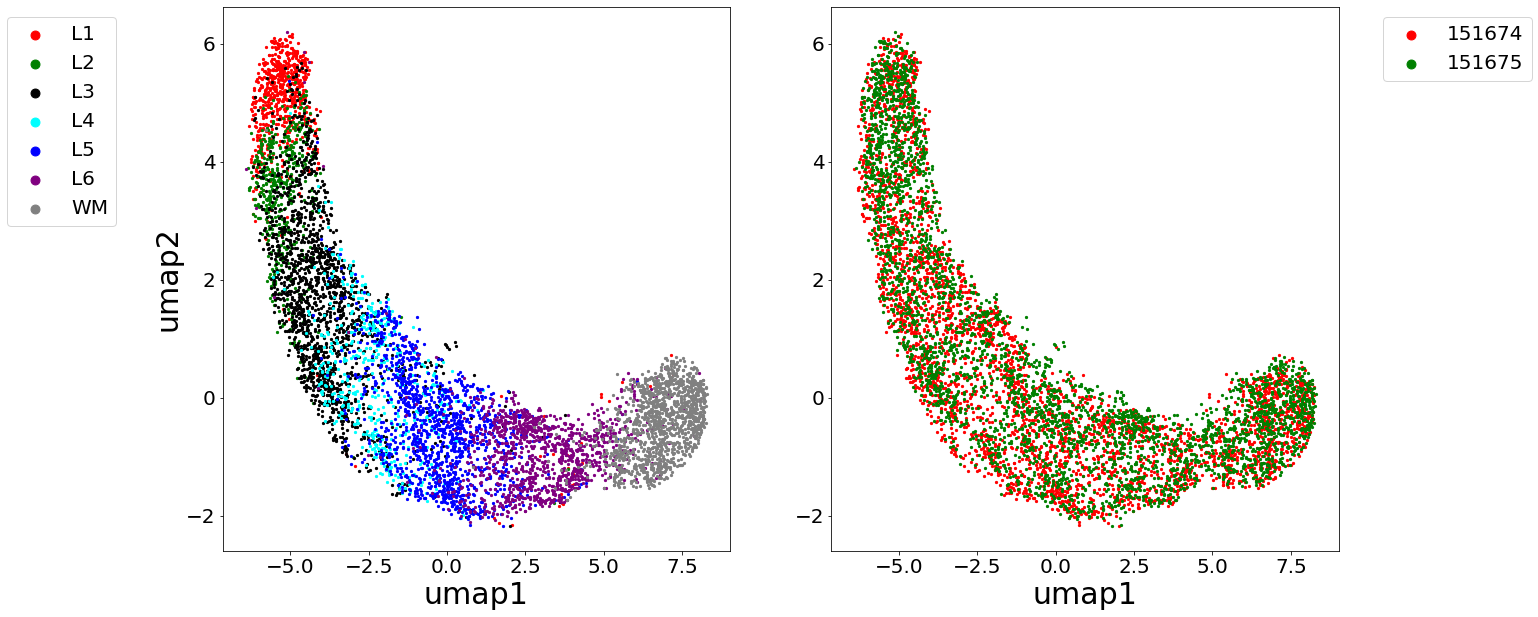

In [122]:
celltype=adata.obs['celltype']
ul=np.unique(celltype)
batch=adata.obs['batch']
ub=np.unique(batch)
# umap_mat=umap.UMAP().fit_transform(adata.obsm['GraphSCIDRL'])
# umap_mat=np.array(adata1.obsm['spatial'])
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=5
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

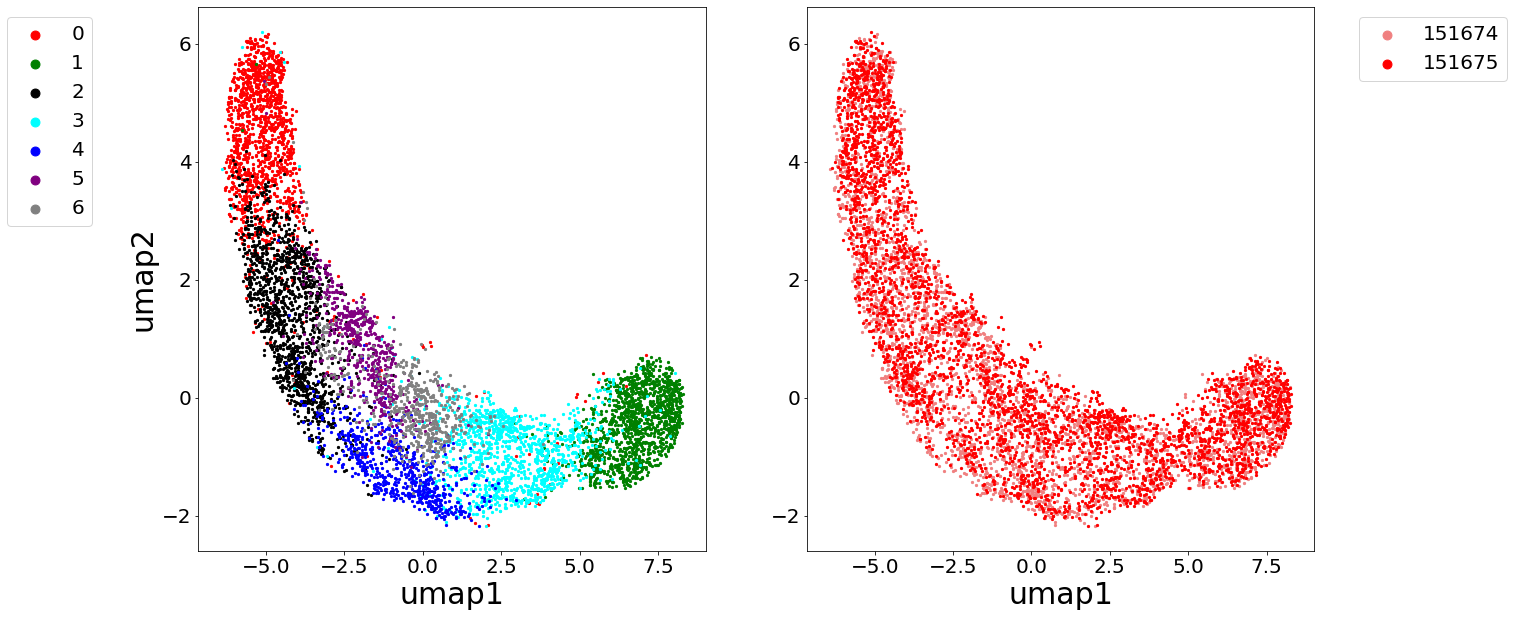

In [124]:
celltype=adata.obs['refined_GraphSCIDRL_louvain']
ul=np.unique(celltype)
# ul=['6','0','1','2','3','4','5']
colour2=['r','g','black','cyan','blue','purple','grey','chocolate']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))

for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

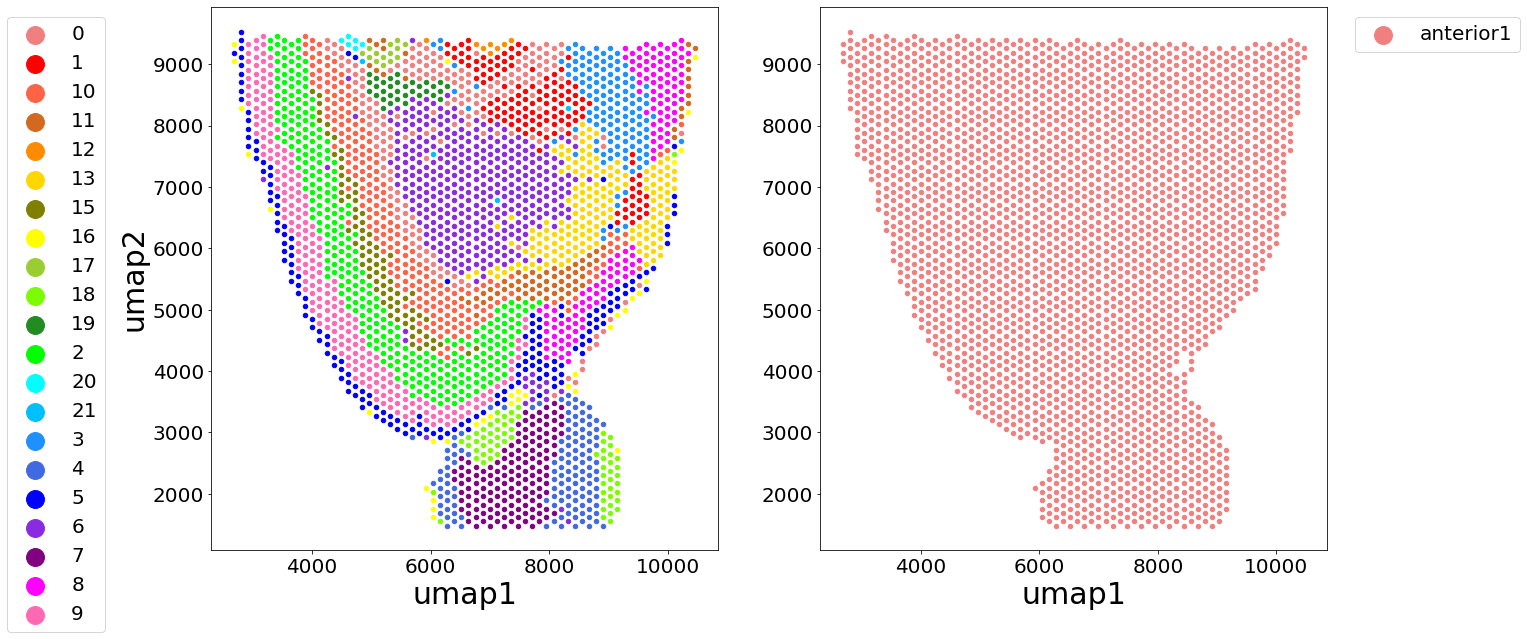

In [58]:
celltype=adata1.obs['seurat_louvain']
ul=np.unique(celltype)
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour1[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

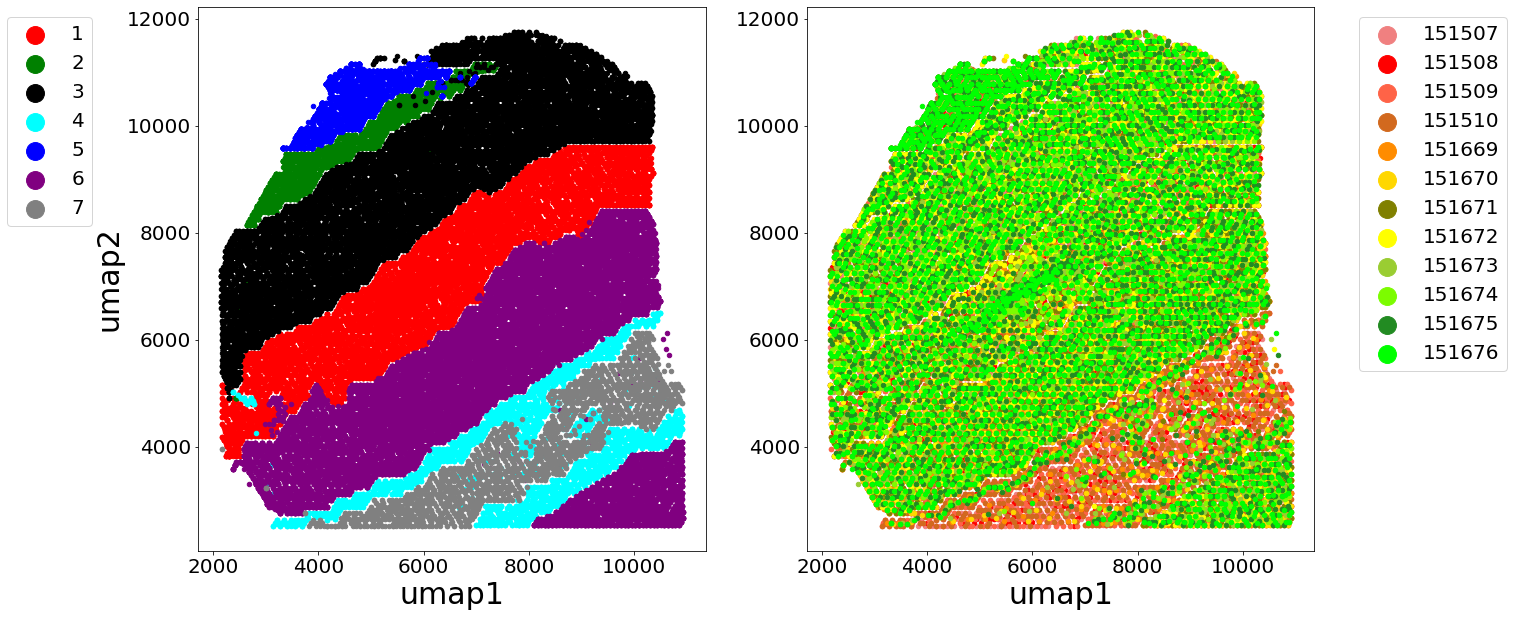

In [67]:
celltype=adata.obs['refined_GraphSCIDRL_mclust']
ul=np.unique(celltype)
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour1[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)

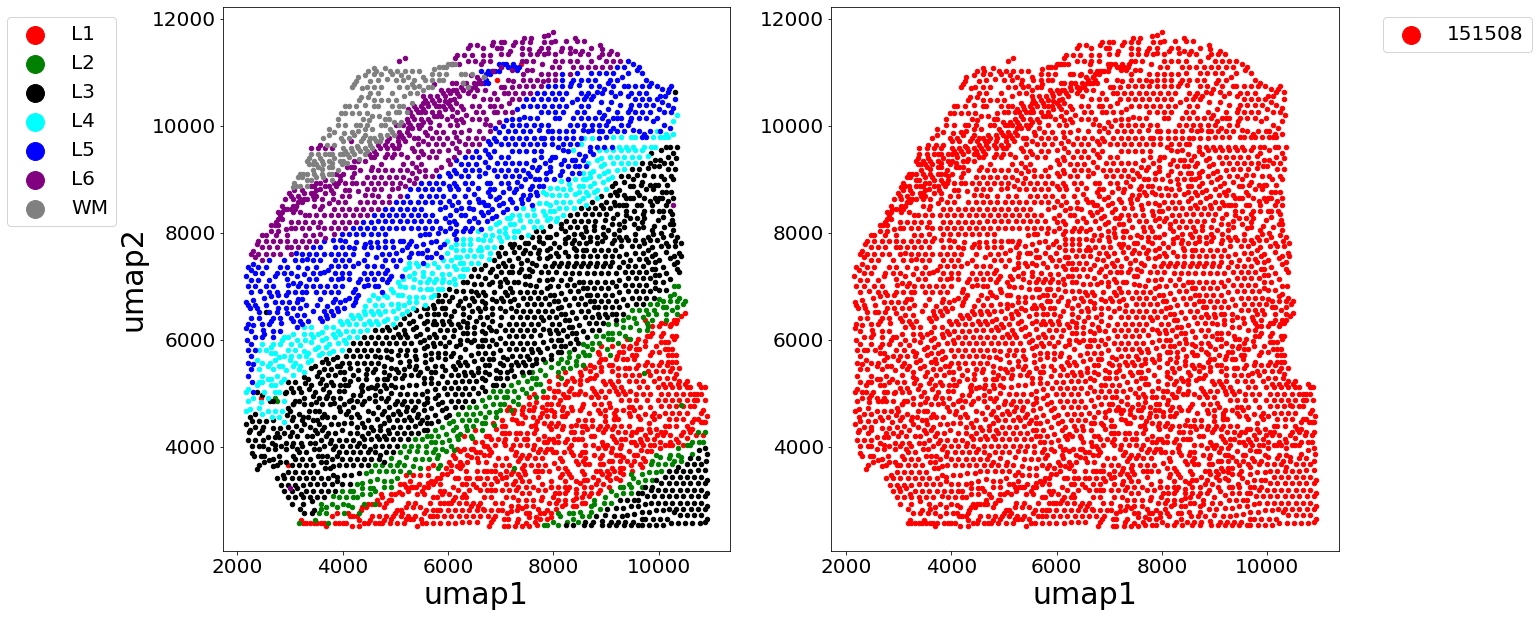

In [69]:
adata1=adata[np.where(adata.obs['batch']==ub[1])[0],:]
celltype=adata1.obs['celltype']
ul=np.unique(celltype)
batch=adata1.obs['batch']
ub=np.unique(batch)
umap_mat=adata1.obsm['spatial_combine'].values
colour2=['r','g','black','cyan','blue','purple','grey']
colour1=['lightcoral','red','tomato','chocolate','darkorange','gold','olive','yellow','yellowgreen','lawngreen','forestgreen','lime',
       'cyan','deepskyblue','dodgerblue','royalblue','blue','blueviolet','purple','fuchsia','hotpink','pink','gray','black','teal']
f, axs= plt.subplots(1,2,figsize=(20,10))
size=20
for i in range(len(ul)):
    axs[0].scatter(umap_mat[np.where(celltype==ul[i])[0],0],umap_mat[np.where(celltype==ul[i])[0],1],c=colour2[i],s=size)

axs[0].set_xlabel("umap1",fontsize=30)
axs[0].set_ylabel("umap2",fontsize=30)
axs[0].legend(ul,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(-0.19,1))
axs[0].tick_params(axis='both', which='major', labelsize=20)
for i in range(len(ub)):
    axs[1].scatter(umap_mat[np.where(batch==ub[i])[0],0],umap_mat[np.where(batch==ub[i])[0],1],c=colour2[i],s=size)
axs[1].set_xlabel("umap1",fontsize=30)
axs[1].legend(ub,loc="best",fontsize=20,markerscale=4,bbox_to_anchor=(1.4,1))
axs[1].tick_params(axis='both', which='major', labelsize=20)